In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 43.1MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout 

In [ ]:
#generators = divide whole data in batches like here many batches therfore
# at a time only a batch of photos is uploaded on RAM

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels ='inferred',
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels ='inferred',
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)
)

# These images stored in form of numpy array, each pixel value in np array is b/w 0-255
# Need to Normalise pixel values b/w 0-1

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)  # dividing pixel by 255
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Create CNN model

# Convolution layers
# layer 1: 32 filters
# layer 2: 64 filters
# layer 3: 128 filters

model = Sequential() # model is object of sequential class

model.add(Conv2D(32,kernel_size=(3,3,), padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3,), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3,), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

# 3 fully connected layers
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics =['accuracy'])


batch_size = 32 

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 122ms/step - loss: 1.2969 - accuracy: 0.5979 - val_loss: 0.6566 - val_accuracy: 0.6314
Epoch 2/10
625/625 [==============================] - 73s 116ms/step - loss: 0.6003 - accuracy: 0.6869 - val_loss: 0.6383 - val_accuracy: 0.6852
Epoch 3/10
625/625 [==============================] - 72s 115ms/step - loss: 0.5136 - accuracy: 0.7427 - val_loss: 0.5824 - val_accuracy: 0.6658
Epoch 4/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4486 - accuracy: 0.7844 - val_loss: 0.8341 - val_accuracy: 0.5720
Epoch 5/10
625/625 [==============================] - 73s 116ms/step - loss: 0.4013 - accuracy: 0.8140 - val_loss: 0.9494 - val_accuracy: 0.5886
Epoch 6/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3529 - accuracy: 0.8370 - val_loss: 0.4656 - val_accuracy: 0.7896
Epoch 7/10
625/625 [==============================] - 72s 115ms/step - loss: 0.2918 - accuracy: 0.8699 - val_loss: 1.2780 - val_ac

In [ ]:
# gap between train data and validation data plotlines
# clearly indicates overfitting i.e our model is working 
# quite well on train dataset but not on validation

# ways to reduce overfitting

# Add more data
# Data Augmentation: creating more data using existing data
# L1/L2 Regularizer
# Dropout (layer)
# Batch Norm
# Reduce complexity

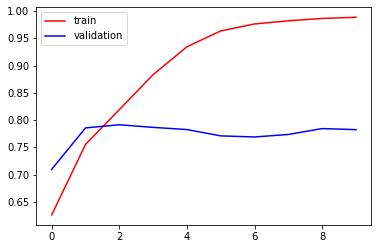

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

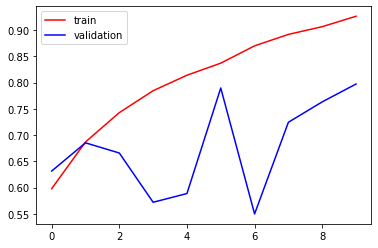

In [ ]:
# after reducing overfitting
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

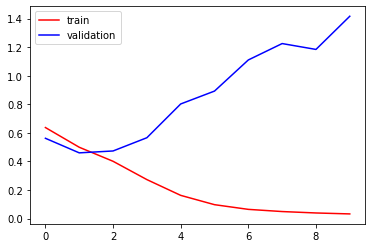

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

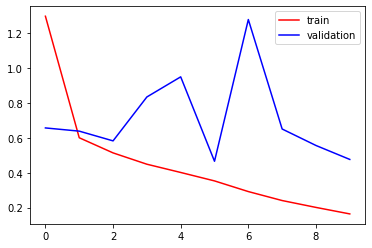

In [ ]:
# after reducing overfitting
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

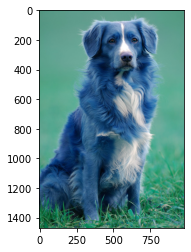

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1470, 980, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 16ms/step


array([[1.]], dtype=float32)